In [ ]:
!pip install shap
!pip install lime

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, roc_curve, auc
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('Mental Health Dataset.csv')

In [ ]:
# Check for date/time columns in the dataset
print(df.dtypes)

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object


In [ ]:
# Drop the 'Timestamp' column
df = df.drop(['Timestamp'], axis=1)

In [ ]:
# Data Preprocessing
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Handle object type columns (convert to numerical or binary if needed)
df['Days_Indoors'] = label_encoder.fit_transform(df['Days_Indoors'])
df['Growing_Stress'] = label_encoder.fit_transform(df['Growing_Stress'])
df['Changes_Habits'] = label_encoder.fit_transform(df['Changes_Habits'])
df['Mental_Health_History'] = label_encoder.fit_transform(df['Mental_Health_History'])
df['Mood_Swings'] = label_encoder.fit_transform(df['Mood_Swings'])
df['Coping_Struggles'] = label_encoder.fit_transform(df['Coping_Struggles'])
df['Work_Interest'] = label_encoder.fit_transform(df['Work_Interest'])
df['Social_Weakness'] = label_encoder.fit_transform(df['Social_Weakness'])
df['mental_health_interview'] = label_encoder.fit_transform(df['mental_health_interview'])
df['care_options'] = label_encoder.fit_transform(df['care_options'])

In [ ]:
# Separate features and target variable
X = df.drop(['treatment'], axis=1)
y = df['treatment']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
full_accuracy = accuracy_score(np.concatenate([y_train, y_test]), np.concatenate([y_train_pred, y_test_pred]))

In [ ]:
# Precision, Recall, F1-score
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')
f1 = f1_score(y_test, y_test_pred, average='binary')

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Loss (MSE)
mse = mean_squared_error(y_test, y_test_pred)

In [ ]:
# Display metrics
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 79.31%
Test Accuracy: 73.76%


In [ ]:
print(f'Model Accuracy: {full_accuracy * 100:.2f}%')

Model Accuracy: 78.20%


In [ ]:
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-Score: {f1 * 100:.2f}%')
print(f'Loss (MSE): {mse:.4f}')

Precision: 72.77%
Recall: 76.89%
F1-Score: 74.77%
Loss (MSE): 0.2624


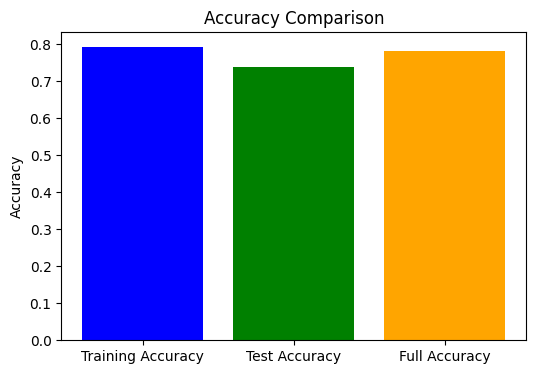

In [ ]:
# 1. Accuracy Bar Plot
plt.figure(figsize=(6, 4))
accuracy_values = [train_accuracy, test_accuracy, full_accuracy]
accuracy_labels = ['Training Accuracy', 'Test Accuracy', 'Full Accuracy']
plt.bar(accuracy_labels, accuracy_values, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

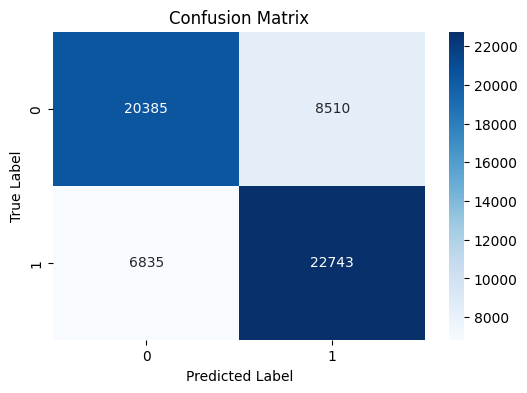

In [ ]:
# 2. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# 3. Precision-Recall Curve
y_test_prob = model.predict_proba(X_test)[:, 1]
precision_vals, recall_vals, _ = roc_curve(y_test, y_test_prob)
auc_val = auc(precision_vals, recall_vals)

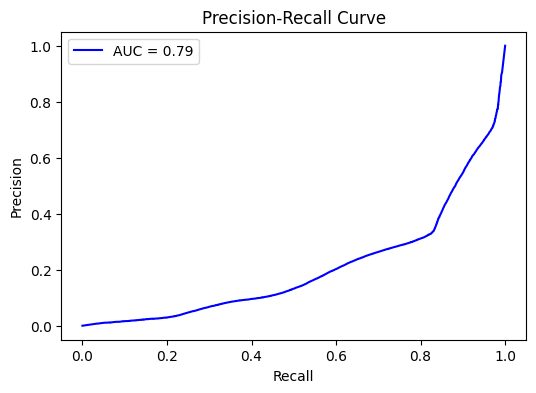

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, label=f'AUC = {auc_val:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

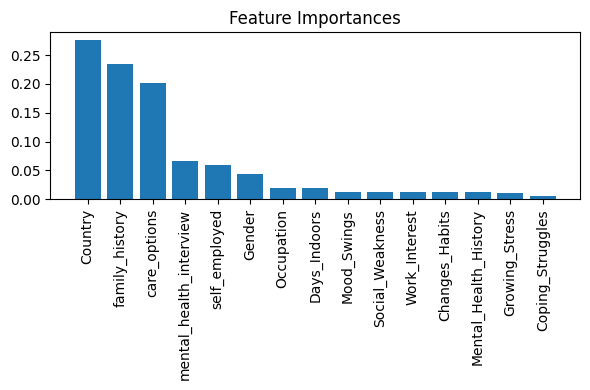

In [ ]:
# 4. Feature Importance Bar Plot (from RandomForest)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(6, 4))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 5. SHAP (SHapley Additive exPlanations)
explainer = shap.TreeExplainer(model)

In [ ]:
# Sample a subset of the test data for faster computation (e.g., 1000 samples)
num_samples = min(500, X_test.shape[0])
X_test_subset = X_test.sample(n=num_samples, random_state=42)

In [ ]:
# Calculate SHAP values for the subset
shap_values = explainer.shap_values(X_test_subset, approximate=True)

<Figure size 1000x1000 with 0 Axes>

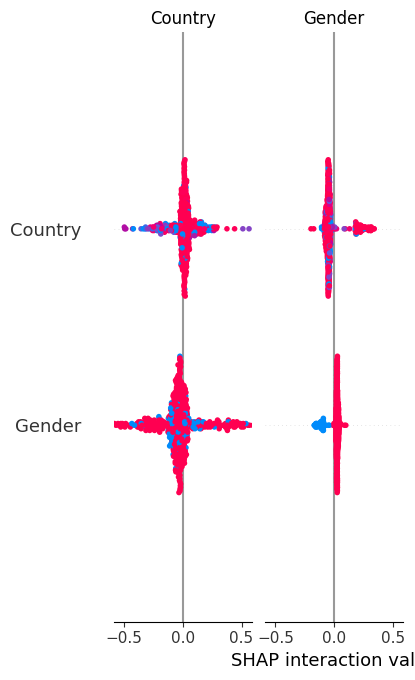

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

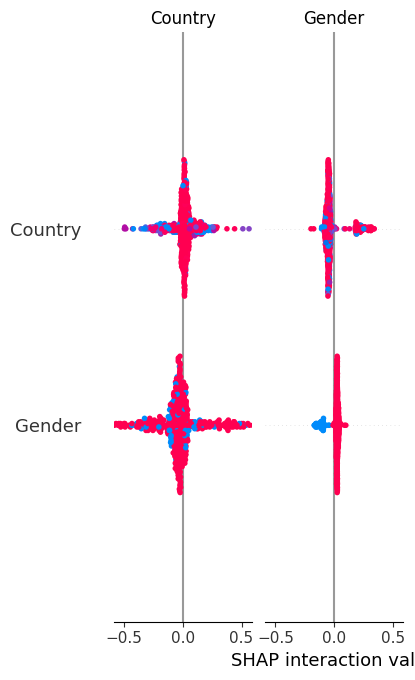

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt
try:
    if isinstance(shap_values, list):
        shap_values_class = shap_values[1]
    else:
        shap_values_class = shap_values

    if shap_values_class.shape[1] != X_test_subset.shape[1]:
        raise ValueError("Shape mismatch: SHAP values and feature matrix have different numbers of features.")

    plt.figure(figsize=(10, 10))
    shap.summary_plot(shap_values_class, X_test_subset, plot_type="bar")
    plt.tight_layout()

    plt.figure(figsize=(10, 10))
    shap.summary_plot(shap_values_class, X_test_subset)
    plt.tight_layout()

except Exception as e:
    print(f"Error generating SHAP summary plots: {e}")

In [ ]:
# Convert test set to DataFrame with feature names
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)


In [ ]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['No Treatment', 'Treatment'],
    discretize_continuous=True
)

In [ ]:
# Explain a single prediction with LIME
i = 0
test_instance_df = pd.DataFrame([X_test.iloc[i].values], columns=X_train.columns)

In [ ]:
# Initialize RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
exp = lime_explainer.explain_instance(test_instance_df.values[0], model.predict_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
exp.show_in_notebook()

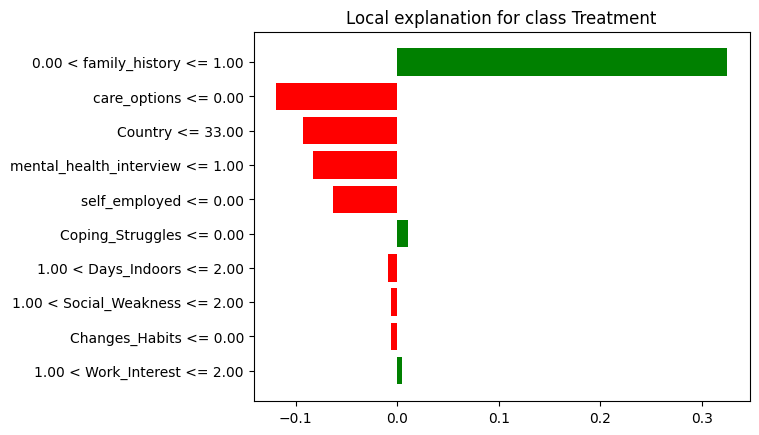

In [ ]:
# Visualize LIME explanation
exp.as_pyplot_figure()
plt.show()